In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from transitfit import LightCurve, KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
lc.save_hdf('test_lc.h5')
lc = LightCurve.load_hdf('test_lc.h5')

In [3]:
model = TransitModel(lc)

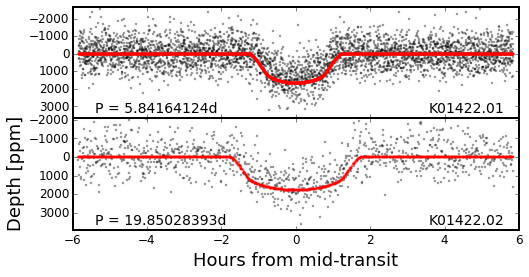

In [4]:
params = lc.default_params  #super-simple guesses for parameters
fig = model.plot_planets(params); #not bad!

In [5]:
model.lnpost(params)

6.5272853302936564

In [6]:
%timeit f = model(params) #evaluates ln(posterior)

10 loops, best of 3: 72.8 ms per loop


In [ ]:
#fit = model.fit_leastsq(params, options={'disp':True})
#fig = model.plot_planets(lc.default_params, color='b'); 
#fig = model.plot_planets(model._bestfit, color='r', fig=fig);

Now, let's do a test `emcee` fit (this many iterations takes about 5 minutes):

In [ ]:
import time
start = time.time()
model.fit_emcee(nburn=10, niter=30); 
stop = time.time()
print 'emcee fit took {:.1f} minutes.'.format((stop-start)/60)

In [8]:
model.save_hdf('test_model.h5')

In [5]:
model = TransitModel.load_hdf('test_model.h5')

In [6]:
model.samples.head()

,dilution,flux_zp,q1,q2,rho,period_1,epoch_1,b_1,rprs_1,ecc_1,omega_1,period_2,epoch_2,b_2,rprs_2,ecc_2,omega_2
0,0.001811,1.001383,0.500405,0.499275,4.000692,5.839189,135.922801,0.500848,0.037985,0.001209,0.000617,19.852457,133.650229,0.500524,0.04386,0.000056,-0.000089
1,0.001811,1.001383,0.500405,0.499275,4.000692,5.839189,135.922801,0.500848,0.037985,0.001209,0.000617,19.852457,133.650229,0.500524,0.04386,0.000056,-0.000089
2,0.001811,1.001383,0.500405,0.499275,4.000692,5.839189,135.922801,0.500848,0.037985,0.001209,0.000617,19.852457,133.650229,0.500524,0.04386,0.000056,-0.000089
3,0.001811,1.001383,0.500405,0.499275,4.000692,5.839189,135.922801,0.500848,0.037985,0.001209,0.000617,19.852457,133.650229,0.500524,0.04386,0.000056,-0.000089
4,0.001811,1.001383,0.500405,0.499275,4.000692,5.839189,135.922801,0.500848,0.037985,0.001209,0.000617,19.852457,133.650229,0.500524,0.04386,0.000056,-0.000089


In [7]:
model.samples.std()

dilution    0.020106
flux_zp     0.055353
q1          0.067433
q2          0.037939
rho         0.054249
period_1    0.041554
epoch_1     0.048848
b_1         0.040815
rprs_1      0.048058
ecc_1       0.021583
omega_1     0.022581
period_2    0.098846
epoch_2     0.071525
b_2         0.038840
rprs_2      0.052025
ecc_2       0.027005
omega_2     0.023932
dtype: float64

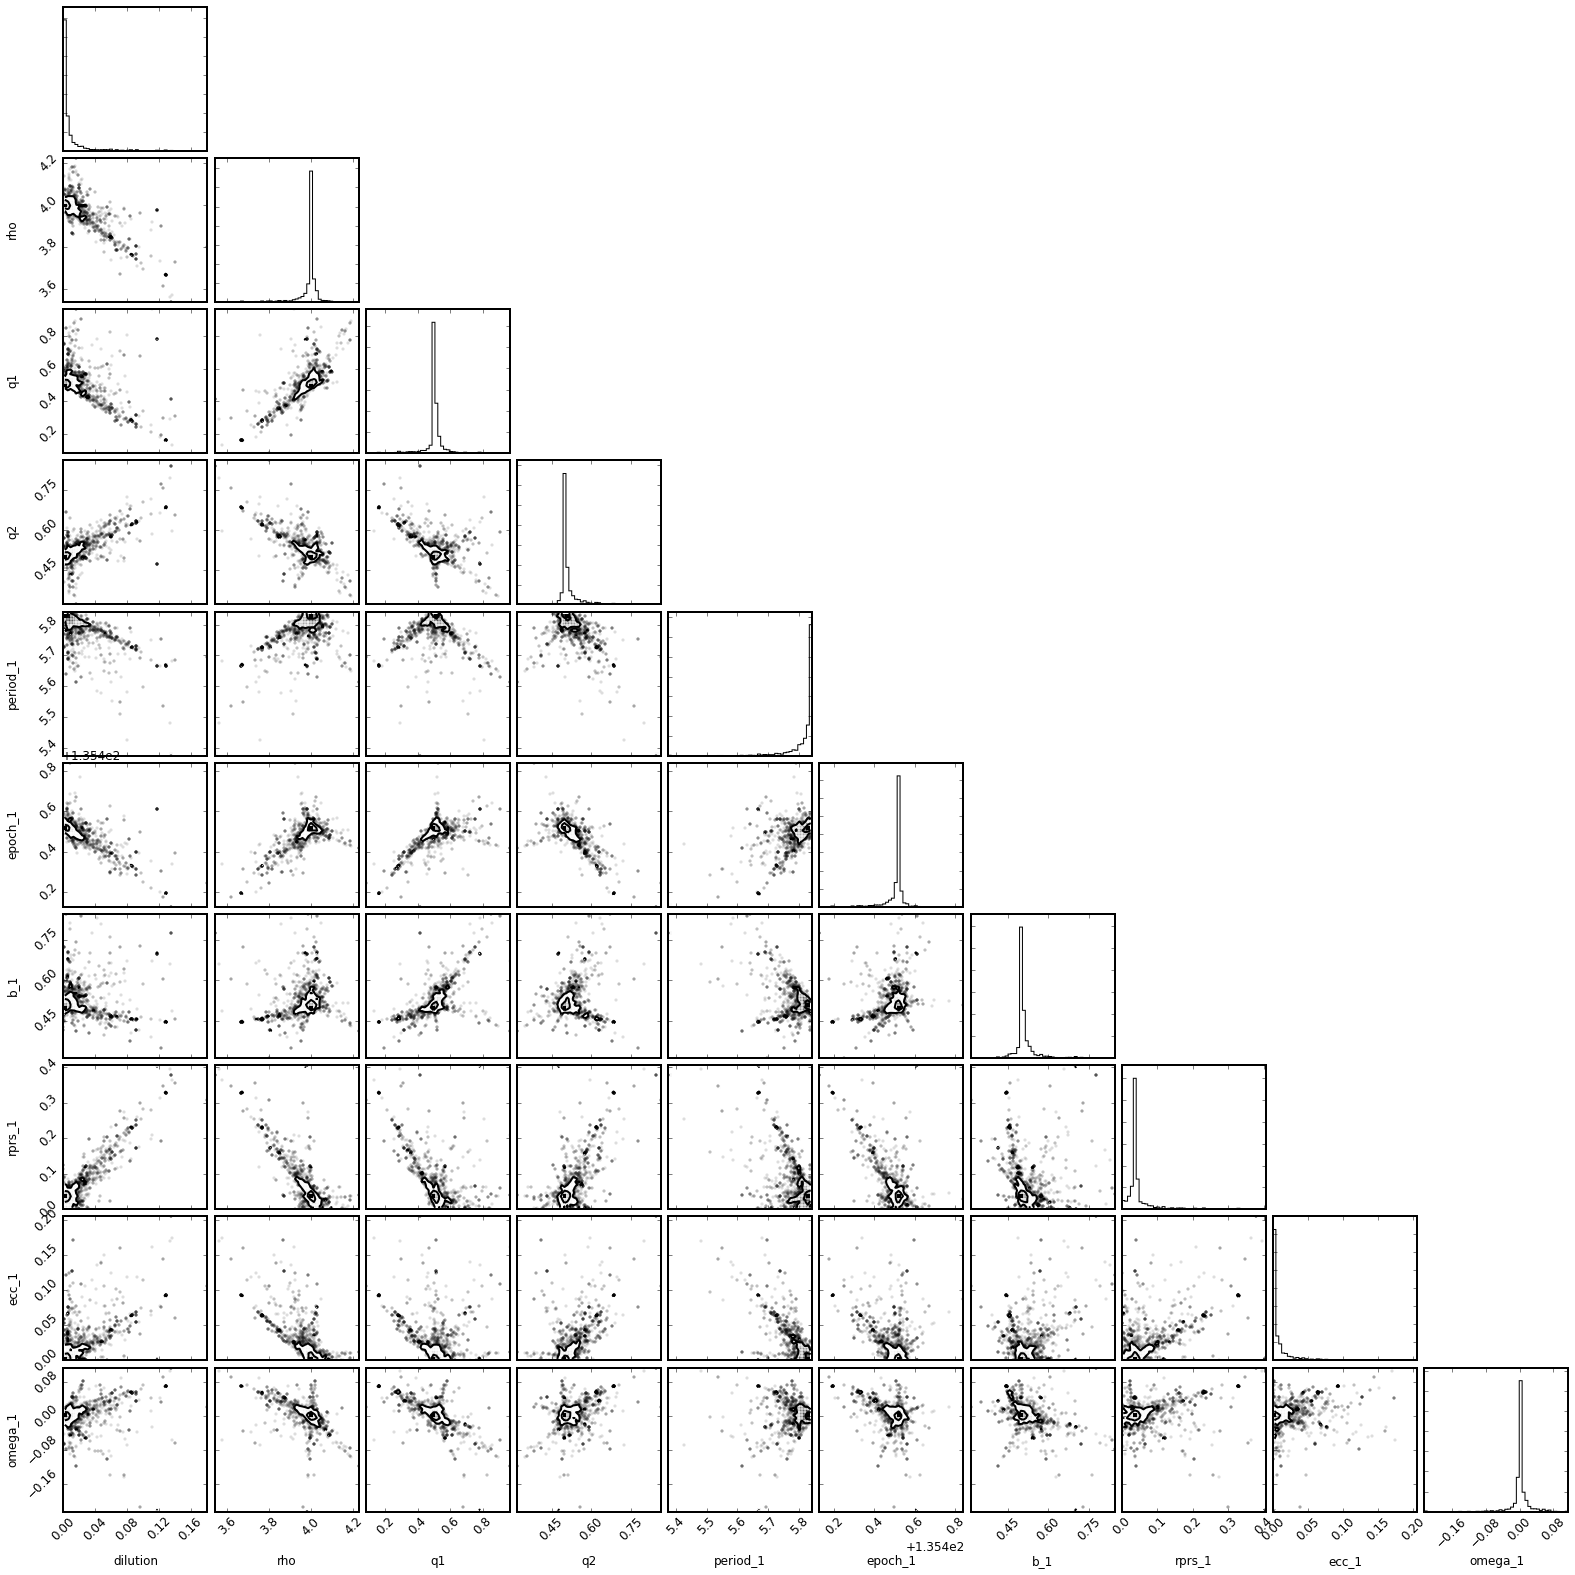

In [8]:
fig = model.triangle(i=0); # for first planet

In [8]:
import time
start = time.time()
model.fit_emcee(nburn=100, niter=200)
stop = time.time()
print '{:.1f}'.format((stop-start)/60)

16.9


In [9]:
model.save_hdf('test_model.h5')

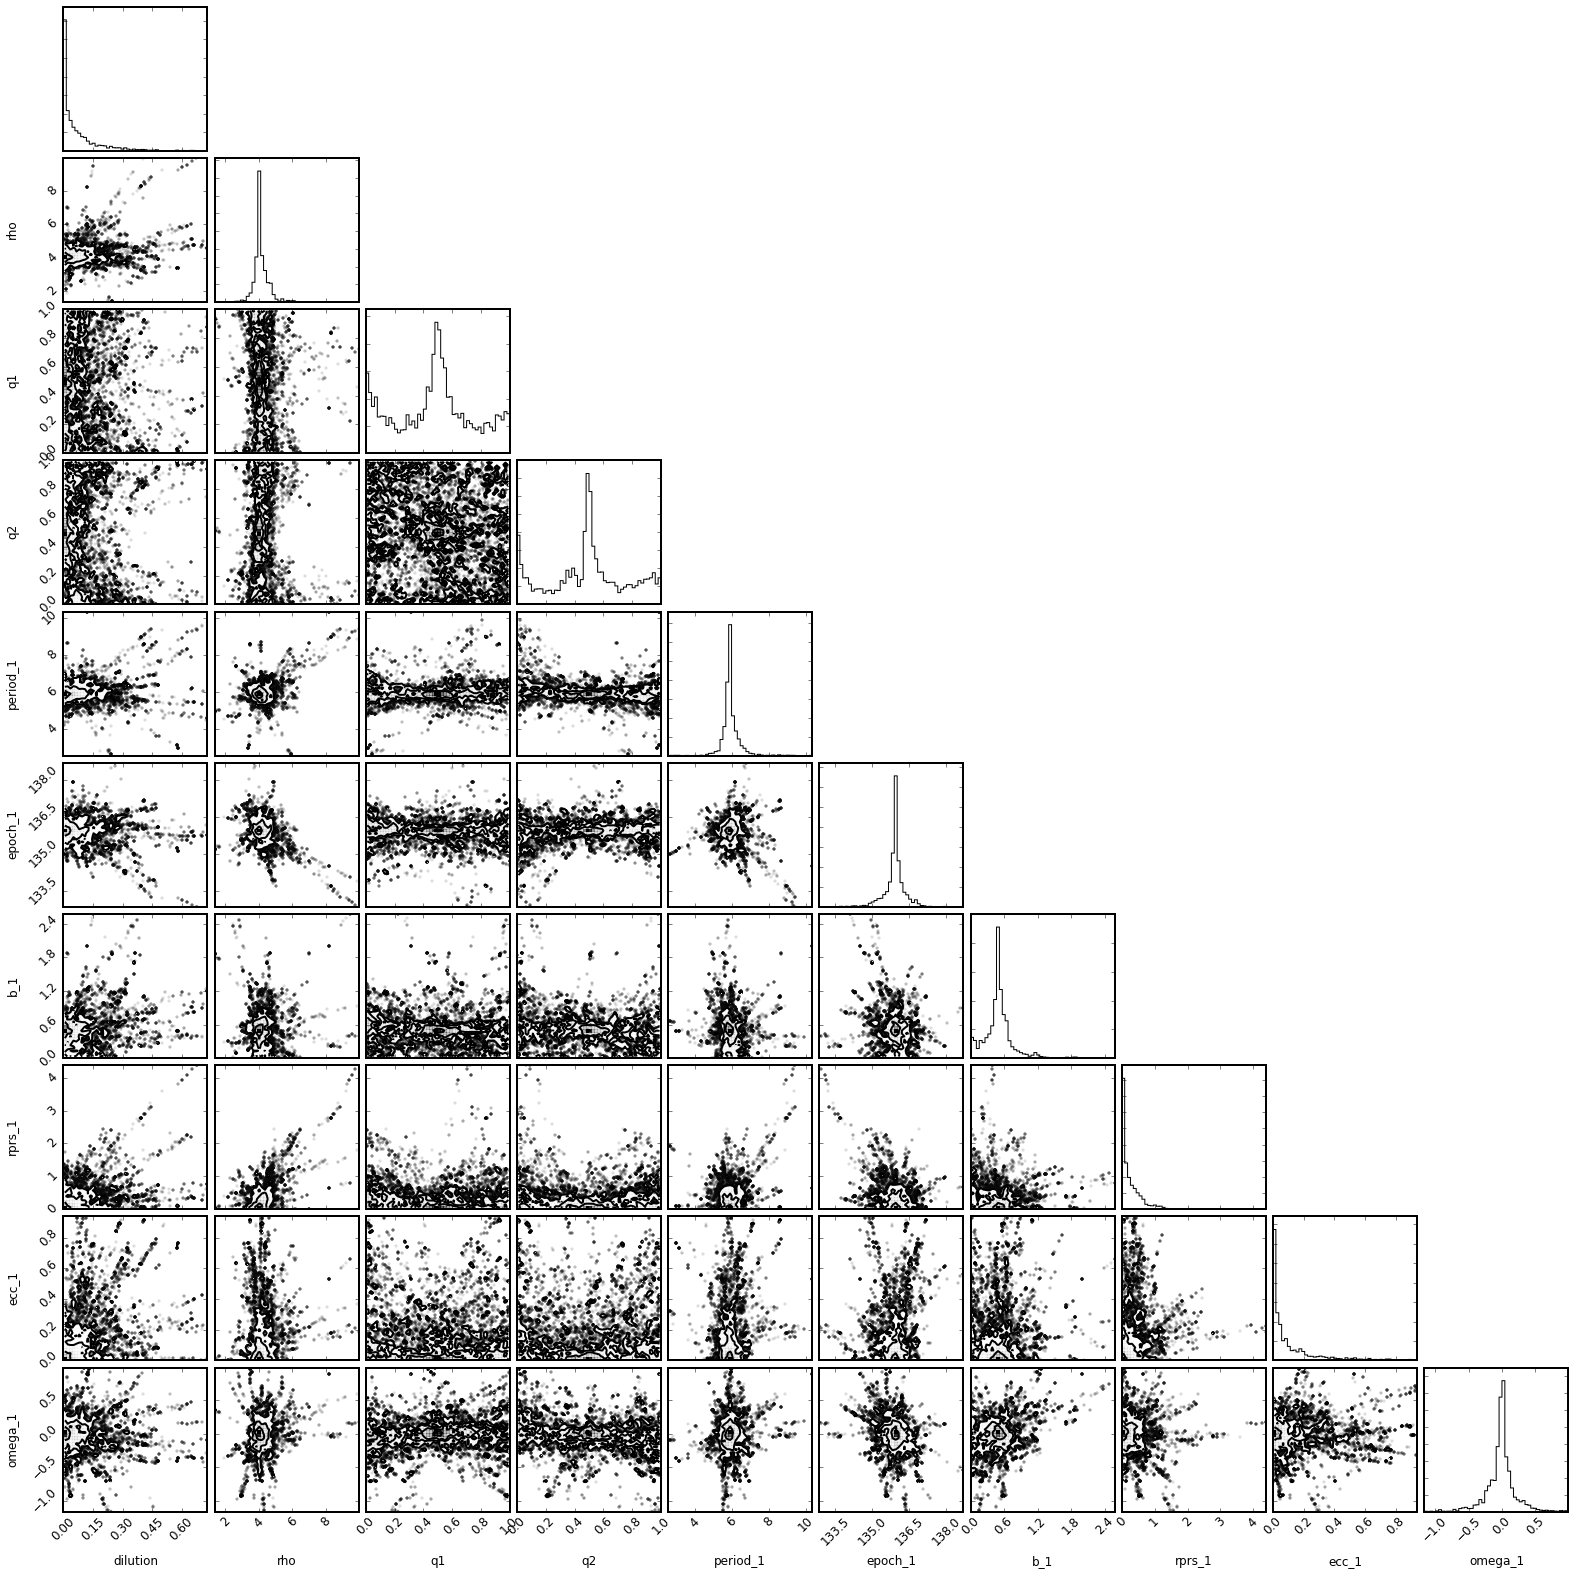

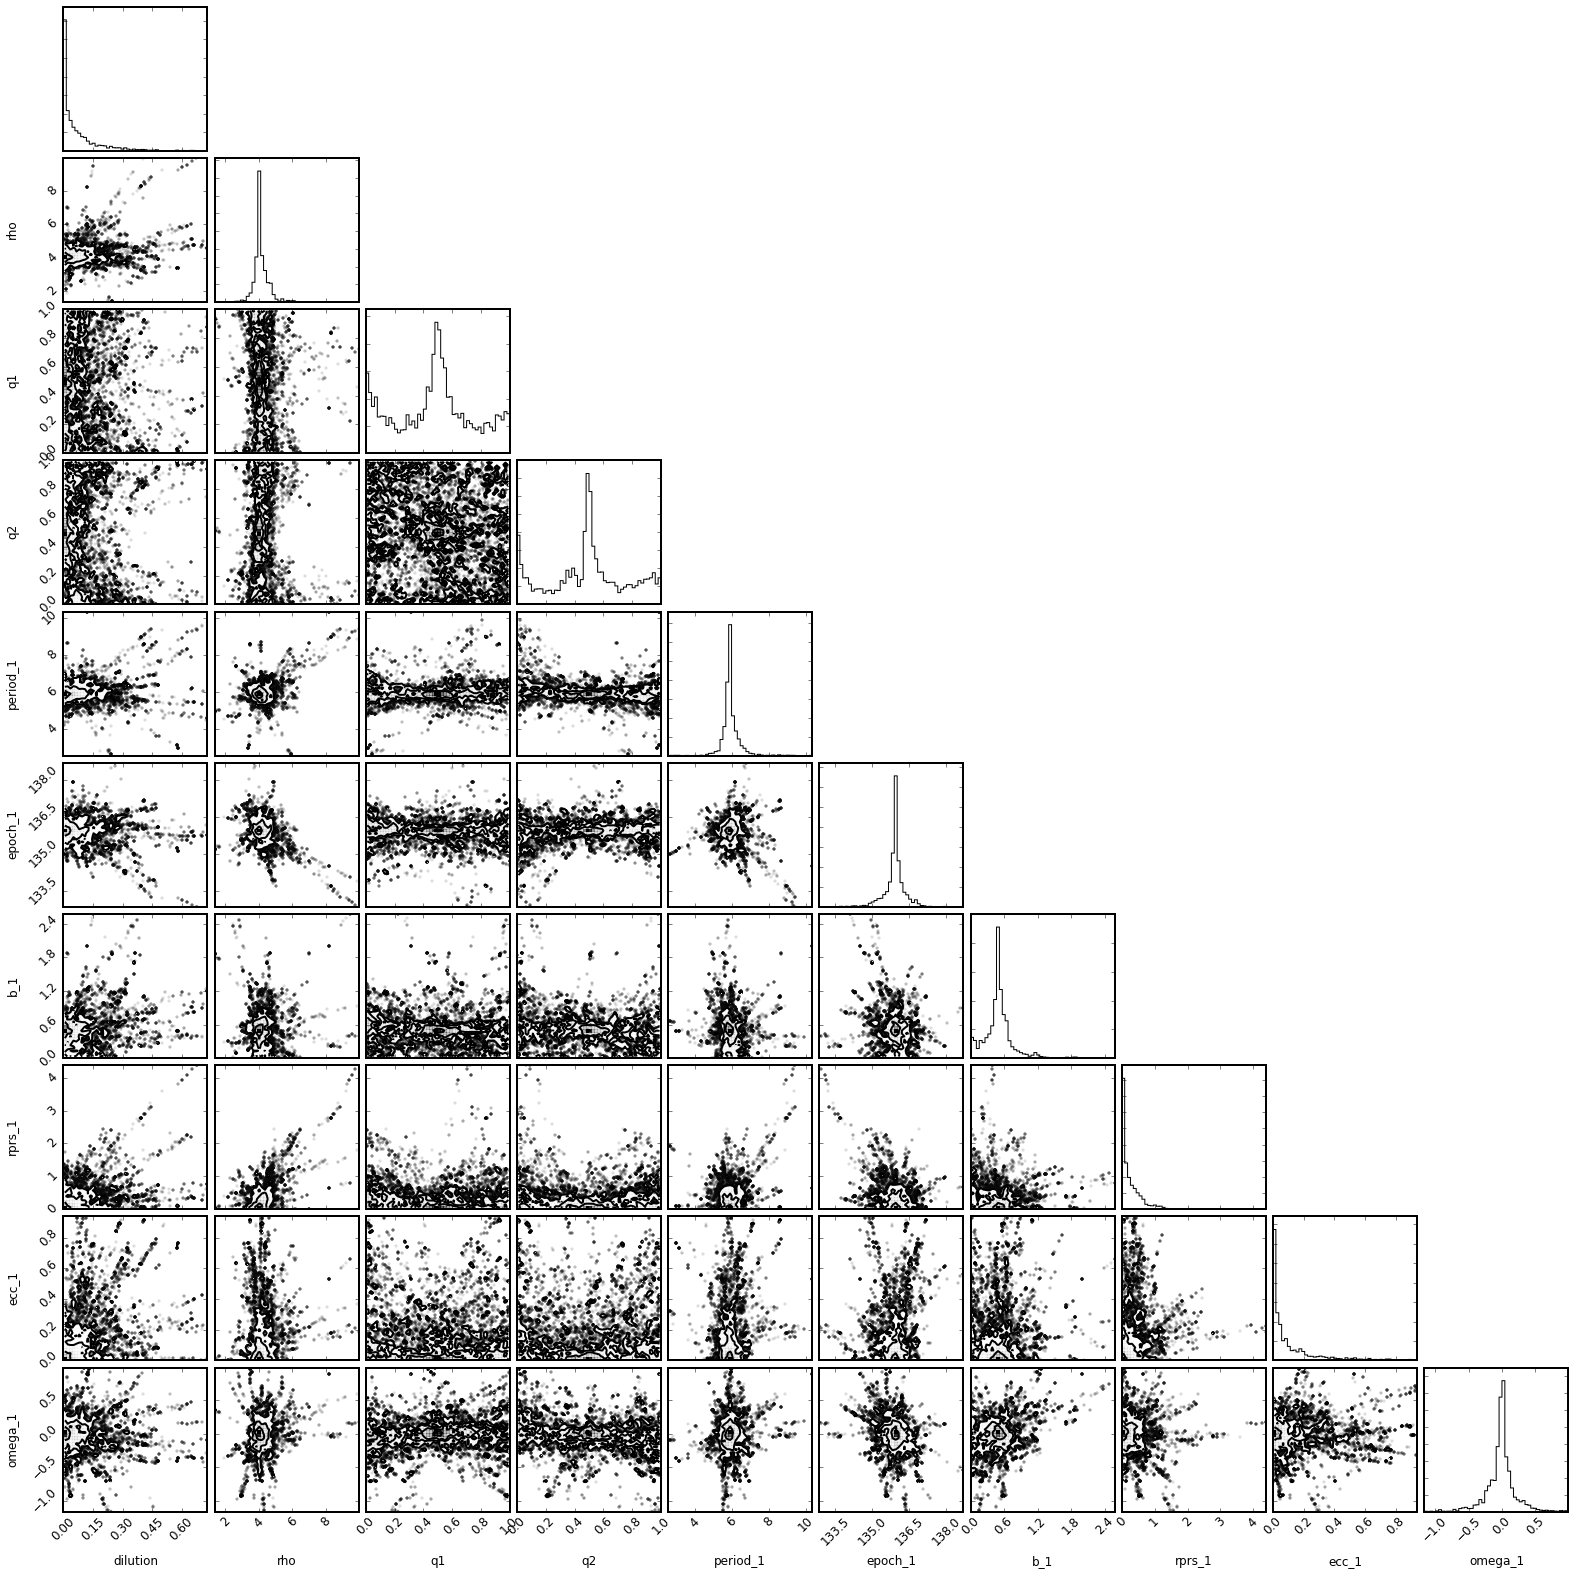

In [11]:
model.triangle(i=0); 